In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0,1))
ms_new = MinMaxScaler(feature_range=(0,1))

In [ ]:
#reading the dataset from the drive
dat = pd.read_csv('/content/drive/MyDrive/Deep Learning/NSE-Tata-Global-Beverages-Limited.csv')
dat

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [ ]:
dat = np.array(dat['Close']).reshape(-1,1)
ms.fit(dat)
dat = ms.fit_transform(np.array(dat))
print(np.shape(dat))
dat

(1235, 1)


array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [ ]:
time_step = 60
X = np.zeros([np.shape(dat)[0]-time_step,time_step])
y = np.zeros([np.shape(dat)[0]-time_step])
for i in range(0,np.shape(dat)[0]-time_step):
  for j in range(i,i+time_step):
    X[i][j-i] = dat[j][0]
  y[i] = dat[i+time_step][0]

print(X)
print(np.shape(X))
print(y)
print(np.shape(y))


[[0.50425818 0.47758853 0.51792918 ... 0.72859704 0.7492156  0.77140296]
 [0.47758853 0.51792918 0.56006275 ... 0.7492156  0.77140296 0.77364411]
 [0.51792918 0.56006275 0.57485433 ... 0.77140296 0.77364411 0.73352757]
 ...
 [0.24137158 0.24271627 0.24069924 ... 0.24831914 0.25459435 0.25728373]
 [0.24271627 0.24069924 0.23442403 ... 0.25459435 0.25728373 0.25773196]
 [0.24069924 0.23442403 0.25930076 ... 0.25728373 0.25773196 0.2371134 ]]
(1175, 60)
[0.77364411 0.73352757 0.75571493 ... 0.25773196 0.2371134  0.23823398]
(1175,)


In [ ]:
X_train = X[0:900,:]
X_test = X[900:1175,:]
y_train = y[0:900]
y_test = y[900:1175]

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(900, 60)
(275, 60)
(900,)
(275,)


In [ ]:
X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X_train)[1],1))
X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X_test)[1],1))
print(np.shape(X_train))
print(np.shape(X_test))

(900, 60, 1)
(275, 60, 1)


In [ ]:
#creating the model
model=Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,epochs=1,batch_size=1,verbose=1)

900/900 [==============================] - 32s 31ms/step - loss: 0.0055


In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_pred = ms.inverse_transform(train_pred)
test_pred = ms.inverse_transform(test_pred)
print("Predicted train values are ---")
print(train_pred)
print("Predicted test values are ---")
print(test_pred)

Predicted train values are ---
[[242.46278 ]
 [246.16165 ]
 [248.743   ]
 [250.92537 ]
 [253.17267 ]
 [255.53215 ]
 [256.37592 ]
 [256.79105 ]
 [256.4808  ]
 [255.96303 ]
 [255.5166  ]
 [254.91025 ]
 [254.08684 ]
 [252.91113 ]
 [251.87988 ]
 [251.51385 ]
 [252.19316 ]
 [253.08366 ]
 [254.47859 ]
 [255.32964 ]
 [255.6784  ]
 [255.41531 ]
 [255.12575 ]
 [254.8486  ]
 [254.49287 ]
 [253.96898 ]
 [252.71669 ]
 [251.86555 ]
 [251.76326 ]
 [251.67    ]
 [251.03598 ]
 [250.44833 ]
 [249.69923 ]
 [248.66708 ]
 [247.23611 ]
 [245.48431 ]
 [243.43307 ]
 [241.50877 ]
 [240.04932 ]
 [238.44199 ]
 [237.0442  ]
 [236.95909 ]
 [240.1281  ]
 [244.48299 ]
 [249.63387 ]
 [254.52785 ]
 [259.21207 ]
 [262.81787 ]
 [265.45142 ]
 [267.82825 ]
 [270.21948 ]
 [271.94067 ]
 [273.09888 ]
 [273.68536 ]
 [273.43927 ]
 [272.8308  ]
 [272.2996  ]
 [271.83783 ]
 [271.2845  ]
 [270.48398 ]
 [269.52917 ]
 [268.24435 ]
 [266.77902 ]
 [265.35327 ]
 [264.20953 ]
 [263.49973 ]
 [262.66278 ]
 [261.87607 ]
 [260.96136 ]
 [2

In [ ]:
print(np.shape(y_test))
y_test=y_test.reshape(-1,1)
print(np.shape(y_test))
y_test = ms.inverse_transform(y_test)
y_test

(275,)
(275, 1)


array([[156.75],
       [156.95],
       [157.85],
       [159.4 ],
       [159.9 ],
       [155.25],
       [154.2 ],
       [155.85],
       [158.25],
       [157.75],
       [160.9 ],
       [161.65],
       [163.75],
       [160.1 ],
       [157.45],
       [157.3 ],
       [156.35],
       [156.3 ],
       [158.35],
       [156.5 ],
       [155.55],
       [154.7 ],
       [153.35],
       [152.35],
       [156.4 ],
       [157.5 ],
       [160.25],
       [161.25],
       [160.25],
       [158.8 ],
       [158.85],
       [159.35],
       [159.  ],
       [159.65],
       [160.3 ],
       [164.75],
       [164.45],
       [170.6 ],
       [168.6 ],
       [164.85],
       [161.6 ],
       [159.45],
       [167.2 ],
       [169.55],
       [167.4 ],
       [162.55],
       [165.2 ],
       [164.6 ],
       [162.25],
       [162.2 ],
       [154.25],
       [155.4 ],
       [153.9 ],
       [150.5 ],
       [153.1 ],
       [152.95],
       [155.45],
       [155.45],
       [157.1 

In [ ]:
print(np.shape(y_train))
y_train=y_train.reshape(-1,1)
print(np.shape(y_train))
y_train = ms.inverse_transform(y_train)
y_train

(900,)
(900, 1)


array([[275.25],
       [266.3 ],
       [271.25],
       [277.3 ],
       [281.  ],
       [264.45],
       [269.35],
       [263.95],
       [265.6 ],
       [267.35],
       [264.5 ],
       [262.1 ],
       [258.2 ],
       [260.85],
       [267.05],
       [275.35],
       [272.15],
       [277.8 ],
       [269.6 ],
       [267.6 ],
       [263.7 ],
       [266.95],
       [267.1 ],
       [265.75],
       [263.75],
       [255.25],
       [263.25],
       [269.2 ],
       [264.5 ],
       [257.5 ],
       [260.65],
       [257.85],
       [254.5 ],
       [250.2 ],
       [247.15],
       [243.55],
       [244.7 ],
       [247.5 ],
       [241.1 ],
       [242.65],
       [255.9 ],
       [287.5 ],
       [285.25],
       [292.  ],
       [289.7 ],
       [294.2 ],
       [287.8 ],
       [286.65],
       [292.75],
       [297.55],
       [292.1 ],
       [291.2 ],
       [289.1 ],
       [283.15],
       [283.6 ],
       [286.3 ],
       [286.2 ],
       [284.1 ],
       [280.95

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(np.mean(y_test-test_pred)**2)

1.3132475031072446

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(np.mean(y_train-train_pred)**2)

0.013232360839844356

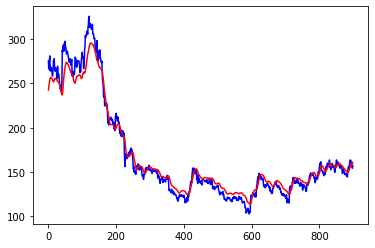

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train,color='b')
plt.plot(train_pred,color='r')

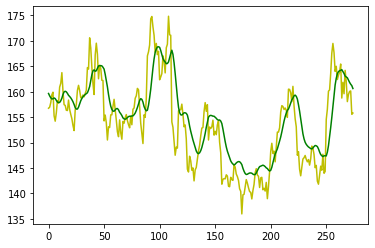

In [ ]:
plt.plot(y_test,color='y')
plt.plot(test_pred,color='g')

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/Deep Learning/NSE-Tata-Global-Beverages-Limited.csv')
df = pd.DataFrame(dat)
df = df.drop(['Date'],axis=1)
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...
1230,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [ ]:
ms.fit(df)
dat = ms.fit_transform(np.array(df))
print(np.shape(df))
ms_new.fit(np.reshape(np.array(df['Total Trade Quantity']),(-1,1)))
ms_new.fit_transform(np.reshape(np.array(df['Total Trade Quantity']),(-1,1)))
dat

(1235, 7)


array([[0.46728972, 0.52487174, 0.48206632, ..., 0.50425818, 0.15613048,
        0.17859642],
       [0.50734312, 0.508588  , 0.47778028, ..., 0.47758853, 0.11753994,
        0.13085399],
       [0.53627058, 0.54963194, 0.52402436, ..., 0.51792918, 0.05598347,
        0.0662942 ],
       ...,
       [0.23587005, 0.25072496, 0.25197383, ..., 0.25773196, 0.1039734 ,
        0.08720148],
       [0.23453494, 0.23912559, 0.24430408, ..., 0.2371134 , 0.0670108 ,
        0.05530494],
       [0.24032043, 0.23734107, 0.24904128, ..., 0.23823398, 0.05569565,
        0.04603696]])

In [ ]:
X = np.zeros((1175,60,7))
y = []
print(np.shape(X))
for i in range(0,1175):
  for j in range(0,60):
    for k in range(0,7):
      X[i][j][k] = dat[i+j][k]
  y.append(dat[i+60][5])
print(np.shape(y))
print(y)
X

(1175, 60, 7)
(1175,)
[0.07450133349558374, 0.06607417765767122, 0.0769393865800002, 0.12024515624938233, 0.2260670757645836, 0.1224252586768307, 0.06798522627487316, 0.15162930180587805, 0.07335726183177622, 0.07246986894669748, 0.0688626503845627, 0.08111324408529352, 0.10038900567824884, 0.11230588602905348, 0.2105317705731032, 0.049546257438124415, 0.1042614624159121, 0.12191344799831287, 0.03892854914614861, 0.03803441874391024, 0.11819908228828771, 0.03451234727363447, 0.04905146242794337, 0.06709456775647725, 0.141210797146249, 0.05908964111892973, 0.0867166239814017, 0.11583459189122622, 0.1393554361708765, 0.07340985571572628, 0.08762790755232705, 0.06776416008684522, 0.09697463135726424, 0.14422428919623656, 0.1057120567353945, 0.10588145716683622, 0.10991551119106757, 0.2409202073436531, 0.21409846090701765, 0.31618717716421685, 0.5748431421786278, 0.06442396720479147, 0.04627588035888279, 0.05913302247941663, 0.05571524502476468, 0.060100406193222024, 0.044662244999155234, 

array([[[0.46728972, 0.52487174, 0.48206632, ..., 0.50425818,
         0.15613048, 0.17859642],
        [0.50734312, 0.508588  , 0.47778028, ..., 0.47758853,
         0.11753994, 0.13085399],
        [0.53627058, 0.54963194, 0.52402436, ..., 0.51792918,
         0.05598347, 0.0662942 ],
        ...,
        [0.74499332, 0.74882891, 0.74148432, ..., 0.72859704,
         0.07390771, 0.10637507],
        [0.76457499, 0.7622128 , 0.75547034, ..., 0.7492156 ,
         0.0449457 , 0.06621834],
        [0.7694704 , 0.77269685, 0.77847958, ..., 0.77140296,
         0.04071189, 0.06120387]],

       [[0.50734312, 0.508588  , 0.47778028, ..., 0.47758853,
         0.11753994, 0.13085399],
        [0.53627058, 0.54963194, 0.52402436, ..., 0.51792918,
         0.05598347, 0.0662942 ],
        [0.56519804, 0.59290654, 0.56733589, ..., 0.56006275,
         0.05528923, 0.0688915 ],
        ...,
        [0.76457499, 0.7622128 , 0.75547034, ..., 0.7492156 ,
         0.0449457 , 0.06621834],
        [0.7

In [ ]:
X_train = np.array(X[0:900,:,:])
X_test = np.array(X[900:1175,:,:])
y_train = np.array(y[0:900])
y_test = np.array(y[900:1175])

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(900, 60, 7)
(275, 60, 7)
(900,)
(275,)


In [ ]:
model=Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,epochs=30,batch_size=10,verbose=1)

Epoch 1/30
90/90 [==============================] - 11s 61ms/step - loss: 0.0067
Epoch 2/30
90/90 [==============================] - 5s 57ms/step - loss: 0.0055
Epoch 3/30
90/90 [==============================] - 5s 54ms/step - loss: 0.0054
Epoch 4/30
90/90 [==============================] - 5s 58ms/step - loss: 0.0053
Epoch 5/30
90/90 [==============================] - 6s 62ms/step - loss: 0.0053
Epoch 6/30
90/90 [==============================] - 5s 56ms/step - loss: 0.0054
Epoch 7/30
90/90 [==============================] - 5s 59ms/step - loss: 0.0055
Epoch 8/30
90/90 [==============================] - 5s 59ms/step - loss: 0.0052
Epoch 9/30
90/90 [==============================] - 5s 56ms/step - loss: 0.0052
Epoch 10/30
90/90 [==============================] - 5s 57ms/step - loss: 0.0053
Epoch 11/30
90/90 [==============================] - 6s 62ms/step - loss: 0.0051
Epoch 12/30
90/90 [==============================] - 5s 60ms/step - loss: 0.0052
Epoch 13/30
90/90 [=================

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred = ms_new.inverse_transform(train_pred)
test_pred = ms_new.inverse_transform(test_pred)
print("Predicted train values are ---")
print(train_pred)
print("Predicted test values are ---")
print(test_pred)

Predicted train values are ---
[[ 2495326.5 ]
 [ 2521071.2 ]
 [ 2614692.8 ]
 [ 2748970.8 ]
 [ 3086829.  ]
 [ 4064410.  ]
 [ 4137098.5 ]
 [ 3580913.  ]
 [ 3579681.2 ]
 [ 3301327.  ]
 [ 3034881.5 ]
 [ 2874148.2 ]
 [ 2884111.2 ]
 [ 3059821.2 ]
 [ 3288389.2 ]
 [ 4044358.2 ]
 [ 3662222.2 ]
 [ 3417049.5 ]
 [ 3455663.2 ]
 [ 3052187.2 ]
 [ 2646738.8 ]
 [ 2873550.2 ]
 [ 2746719.2 ]
 [ 2588209.8 ]
 [ 2585284.8 ]
 [ 3073489.2 ]
 [ 3061378.8 ]
 [ 3005737.8 ]
 [ 3142288.5 ]
 [ 3442622.8 ]
 [ 3271789.8 ]
 [ 3094996.8 ]
 [ 2887684.  ]
 [ 2912744.  ]
 [ 3289310.  ]
 [ 3428189.2 ]
 [ 3424522.5 ]
 [ 3401571.5 ]
 [ 4156957.  ]
 [ 4702292.  ]
 [ 5588918.5 ]
 [ 7865474.  ]
 [ 5681160.5 ]
 [ 3874489.2 ]
 [ 2982118.8 ]
 [ 2711165.5 ]
 [ 2785497.2 ]
 [ 2849188.5 ]
 [ 3110107.5 ]
 [ 3173607.5 ]
 [ 3361523.2 ]
 [ 3224343.2 ]
 [ 3673013.5 ]
 [ 4101312.  ]
 [ 3712580.5 ]
 [ 3127200.5 ]
 [ 2895302.5 ]
 [ 2852515.8 ]
 [ 3383607.2 ]
 [ 4133710.8 ]
 [ 4015046.2 ]
 [ 3521855.5 ]
 [ 3121770.2 ]
 [ 2874464.8 ]
 [ 281102

In [ ]:
y_test=y_test.reshape(-1,1)
print(np.shape(y_test))
y_test = ms_new.inverse_transform(y_test)
y_test

(275, 1)


array([[ 1541039.],
       [ 1670273.],
       [ 3713745.],
       [ 1709932.],
       [ 4643861.],
       [ 2634731.],
       [ 2038270.],
       [ 1887415.],
       [ 1662143.],
       [ 1570697.],
       [ 2600609.],
       [ 2428509.],
       [ 2713036.],
       [ 4750346.],
       [ 4589900.],
       [ 1079352.],
       [ 1153614.],
       [ 1019575.],
       [  526665.],
       [ 2010555.],
       [ 2584790.],
       [ 2073712.],
       [ 3946921.],
       [ 2254205.],
       [ 1967222.],
       [ 2022489.],
       [ 3624666.],
       [ 3216539.],
       [ 1524087.],
       [ 2284463.],
       [ 1198264.],
       [ 1917772.],
       [ 2096263.],
       [ 2924724.],
       [ 2973253.],
       [ 2219635.],
       [ 3086572.],
       [ 4342518.],
       [ 6277667.],
       [ 2243468.],
       [ 2748845.],
       [ 3786842.],
       [ 2733612.],
       [ 4325265.],
       [ 6185414.],
       [ 1964477.],
       [ 2016606.],
       [ 3403585.],
       [ 4436559.],
       [ 5685443.],


In [ ]:
y_train=y_train.reshape(-1,1)
print(np.shape(y_train))
y_train = ms_new.inverse_transform(y_train)
y_train

(900, 1)


array([[ 2267486.],
       [ 2022333.],
       [ 2338411.],
       [ 3598212.],
       [ 6676660.],
       [ 3661633.],
       [ 2077927.],
       [ 4511203.],
       [ 2234204.],
       [ 2208389.],
       [ 2103452.],
       [ 2459832.],
       [ 3020580.],
       [ 3367252.],
       [ 6224725.],
       [ 1541522.],
       [ 3133233.],
       [ 3646744.],
       [ 1232644.],
       [ 1206633.],
       [ 3538690.],
       [ 1104173.],
       [ 1527128.],
       [ 2052017.],
       [ 4208120.],
       [ 1819147.],
       [ 2622839.],
       [ 3469905.],
       [ 4154146.],
       [ 2235734.],
       [ 2649349.],
       [ 2071496.],
       [ 2921253.],
       [ 4295785.],
       [ 3175432.],
       [ 3180360.],
       [ 3297714.],
       [ 7108750.],
       [ 6328483.],
       [ 9298329.],
       [16822847.],
       [ 1974327.],
       [ 1446384.],
       [ 1820409.],
       [ 1720983.],
       [ 1848551.],
       [ 1399442.],
       [ 2561225.],
       [ 1857277.],
       [ 3046154.],


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(np.mean(y_test-test_pred)**2)

302066.27136363636

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(np.mean(y_train-train_pred)**2)

185193.84048611112

In [ ]:
r2_score(y_test,test_pred)

0.21845926717694664

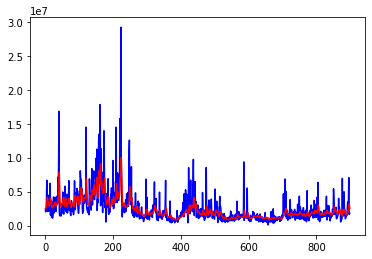

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train,color='b')
plt.plot(train_pred,color='r')

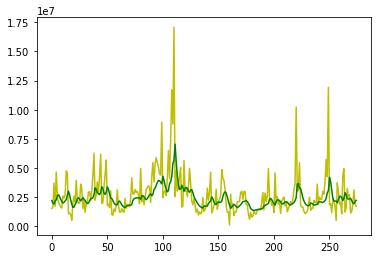

In [ ]:
plt.plot(y_test,color='y')
plt.plot(test_pred,color='g')